In [1]:
import pandas as pd
import numpy as np

In [ ]:
emotion_df = pd.read_csv('Data Chunks/2021-2022_emotion_pct.csv', index_col=0, parse_dates=True)
tweet_count_df = pd.read_csv('Data Chunks/2021-2022_tweet_counts.csv', index_col=0, parse_dates=True)
price_IQR_df = pd.read_csv('Data Chunks/price_IQR.csv', index_col=0, parse_dates=True)

combined_aux_df = tweet_count_df.join(emotion_df, how='inner')
combined_df = combined_aux_df.join(price_IQR_df, how='inner')
combined_df

NameError: name 'pd' is not defined

In [10]:
combined_df.columns

Index(['Tweet Count', 'Greed', 'Excitement', 'Optimism', 'Neutral',
       'Pessimism', 'Fear', 'Anger', 'IQR', 'Price'],
      dtype='object')

In [12]:
df = combined_df.copy()

In [13]:
df['Price'] = df['Price'].pct_change().fillna(0)
df

,Tweet Count,Greed,Excitement,Optimism,Neutral,Pessimism,Fear,Anger,IQR,Price
date,,,,,,,,,,
2021-01-01,134.500000,0.024744,0.178726,0.309345,0.227918,0.064176,0.049783,0.145308,5.410763,0.000000
2021-01-02,188.125000,0.025019,0.235280,0.251761,0.228954,0.076496,0.057762,0.124729,5.406495,0.048843
2021-01-03,241.750000,0.024758,0.234073,0.249646,0.232556,0.079096,0.058048,0.121823,5.042287,0.090675
2021-01-04,249.444444,0.023963,0.223334,0.250816,0.236487,0.079099,0.060321,0.125980,5.415050,-0.043824
2021-01-05,257.138889,0.023527,0.215488,0.255096,0.239871,0.077637,0.059596,0.128784,6.333709,0.006874
...,...,...,...,...,...,...,...,...,...,...
2022-06-26,121.766667,0.013456,0.112348,0.258840,0.240904,0.094525,0.097302,0.182626,5.191830,0.006395
2022-06-27,107.000000,0.013035,0.116073,0.261829,0.243121,0.090875,0.094628,0.180439,5.072742,-0.015603
2022-06-28,97.866667,0.012803,0.113675,0.263344,0.243152,0.090403,0.093757,0.182866,4.573031,-0.016156


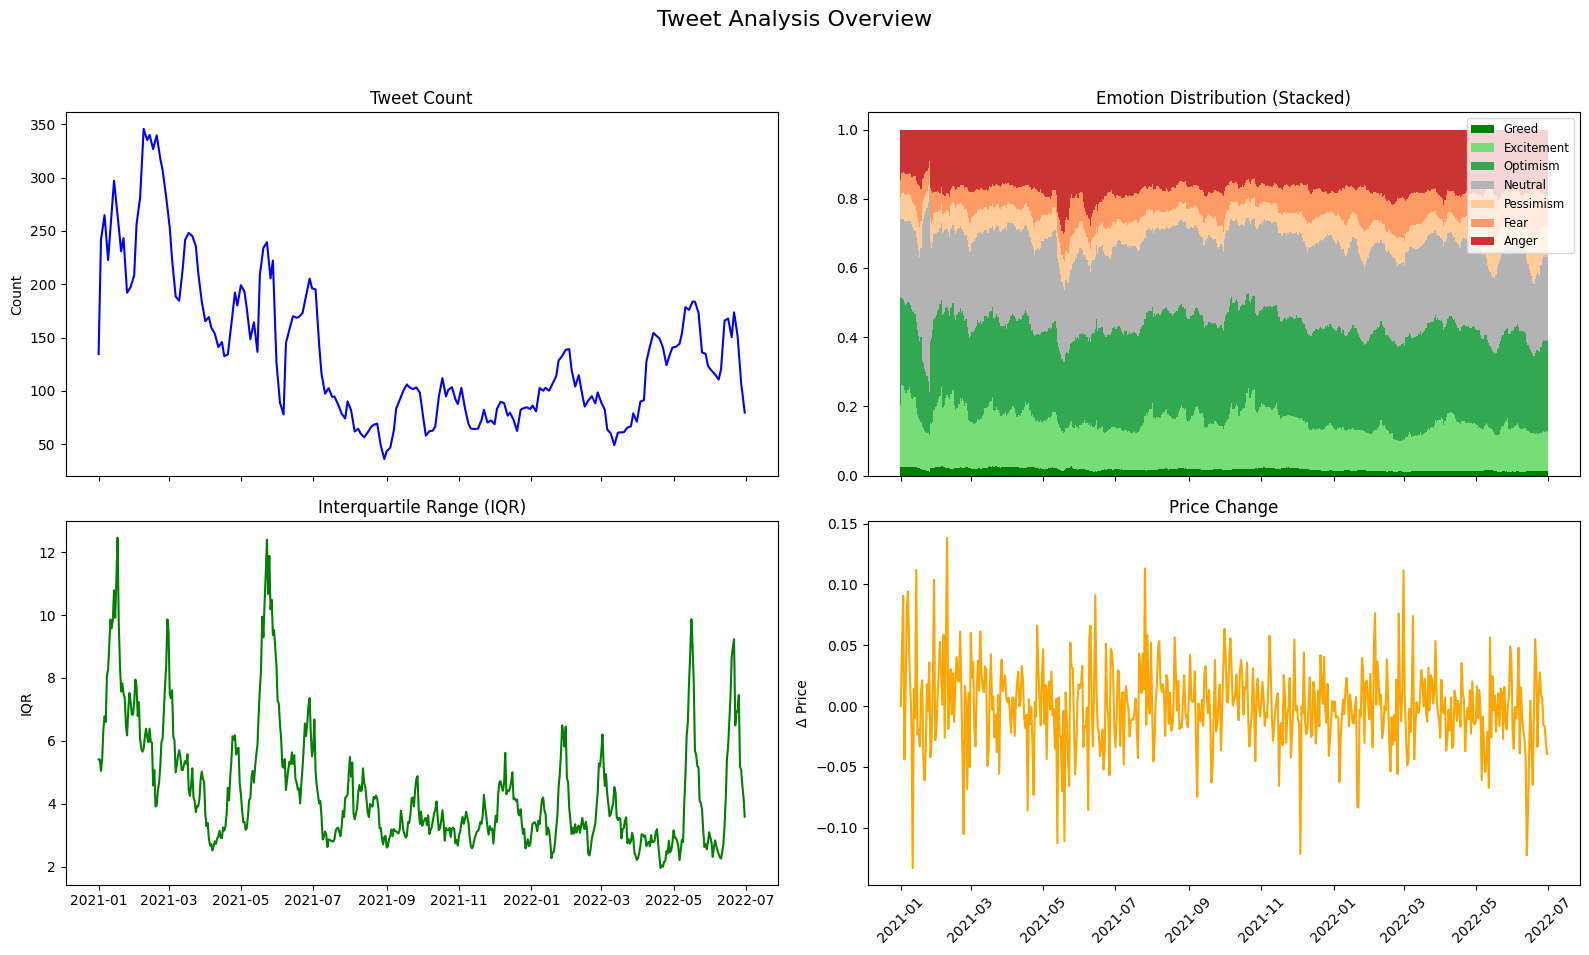

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Data Chunks/input.csv', parse_dates=['date'])

# Set the date as index for easier plotting
df.set_index('date', inplace=True)

# Emotion columns
emotion_cols = ['Greed', 'Excitement', 'Optimism', 'Neutral', 'Pessimism', 'Fear', 'Anger']

# Custom emotion color palette
emotion_colors = {
    "Greed": "#008000",      # Strong Green (Best)
    "Optimism": "#32A852",   # Medium Green
    "Excitement": "#77DD77", # Light Green (Least Good)
    "Neutral": "#B3B3B3",    # Neutral Gray
    "Pessimism": "#FFCC99",  # Light Orange (Least Bad)
    "Fear": "#FF9966",       # Medium Orange
    "Anger": "#CC3333",      # Strong Red (Worst)
}

# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(16, 10), sharex=True)
fig.suptitle('Tweet Analysis Overview', fontsize=16)

# First plot: Tweet Count
axs[0, 0].plot(df.index, df['Tweet Count'], color='blue')
axs[0, 0].set_title('Tweet Count')
axs[0, 0].set_ylabel('Count')

# Second plot: Stacked Bar Plot of 7 Emotions
bottom = pd.Series([0] * len(df), index=df.index)
for emotion in emotion_cols:
    axs[0, 1].bar(df.index, df[emotion], bottom=bottom, label=emotion, color=emotion_colors[emotion], width=1)
    bottom += df[emotion]
axs[0, 1].set_title('Emotion Distribution (Stacked)')
axs[0, 1].legend(loc='upper right', fontsize='small')

# Third plot: IQR
axs[1, 0].plot(df.index, df['IQR'], color='green')
axs[1, 0].set_title('Interquartile Range (IQR)')
axs[1, 0].set_ylabel('IQR')

# Fourth plot: Price
axs[1, 1].plot(df.index, df['Price'], color='orange')
axs[1, 1].set_title('Price Change')
axs[1, 1].set_ylabel('Δ Price')

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
